In [2]:
import pandas as pd
     

data = pd.read_csv("C:\\Users\\deepa\\Downloads\\Elon_musk.csv",encoding="latin1")
     

data.head()
     

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
df =data.drop('Unnamed: 0',axis=1)
     

df.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [4]:
#  cleaning the text by removing irrelevant information like hashtags, mentions, retweets,etc

In [21]:
import re

# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"\[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r";","",text)
    text = re.sub(r":","",text) 
    text = re.sub(r"","",text) 
    

    
    return text

In [22]:
df["Text"] = df["Text"].apply(cleantext)
df.head()

,Text
0,Im alien
1,_AA_Carmack Ray tracing Cyberpunk HDR next-lev...
2,Great interview!
3,Doge underestimated
4,Congratulations Tesla China amazing execution ...


In [7]:
#Word frequency
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq

the      405
to       394
is       353
a        331
of       307
&amp     218
in       209
for      180
be       155
will     137
on       125
I        115
but      111
that     104
with     101
are       95
it        90
at        87
Tesla     85
The       80
dtype: int64

In [8]:
import nltk

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
     

df['Text']

0                                               Im alien
1       _AA_Carmack Ray tracing Cyberpunk HDR next-lev...
2                                        Great interview!
3                                     Doge underestimated
4       Congratulations Tesla China amazing execution ...
                              ...                        
1994    True, sounds surreal, negative propaganda stil...
1995    Make sure read ur terms &amp conditions clicki...
1996                                       Samwise Gamgee
1997           Altho Dumb Dumber <U+0001F525><U+0001F525>
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [23]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq_Sw

&amp                        218
I                           115
Tesla                        85
The                          80
This                         61
We                           58
Yes                          50
launch                       38
like                         38
Its                         38
would                        37
It                           36
great                        36
<U+0001F923><U+0001F923>     34
make                         31
_AA_Carmack                  31
_feed                        30
need                         30
first                        29
Great                        29
dtype: int64

In [26]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [25]:
!pip install textblob

                                              0.0/636.8 kB ? eta -:--:--
                                              10.2/636.8 kB ? eta -:--:--
     ---                                   61.4/636.8 kB 825.8 kB/s eta 0:00:01
     ---                                   61.4/636.8 kB 825.8 kB/s eta 0:00:01
     ------                               122.9/636.8 kB 722.1 kB/s eta 0:00:01
     ------                               122.9/636.8 kB 722.1 kB/s eta 0:00:01
     ---------                            174.1/636.8 kB 615.9 kB/s eta 0:00:01
     ----------                           194.6/636.8 kB 655.9 kB/s eta 0:00:01
     -------------                        235.5/636.8 kB 627.5 kB/s eta 0:00:01
     --------------                       256.0/636.8 kB 655.4 kB/s eta 0:00:01
     -----------------                    317.4/636.8 kB 703.0 kB/s eta 0:00:01
     -------------------                  337.9/636.8 kB 677.0 kB/s eta 0:00:01
     --------------------                 358.4/636.8

In [27]:
# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)

df

,Text,subjectivity,polarity
0,Im alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing Cyberpunk HDR next-lev...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge underestimated,0.000000,0.000000
4,Congratulations Tesla China amazing execution ...,0.366667,0.345313
...,...,...,...
1994,"True, sounds surreal, negative propaganda stil...",0.508333,0.111111
1995,Make sure read ur terms &amp conditions clicki...,0.888889,0.625000
1996,Samwise Gamgee,0.000000,0.000000
1997,Altho Dumb Dumber <U+0001F525><U+0001F525>,0.500000,-0.375000


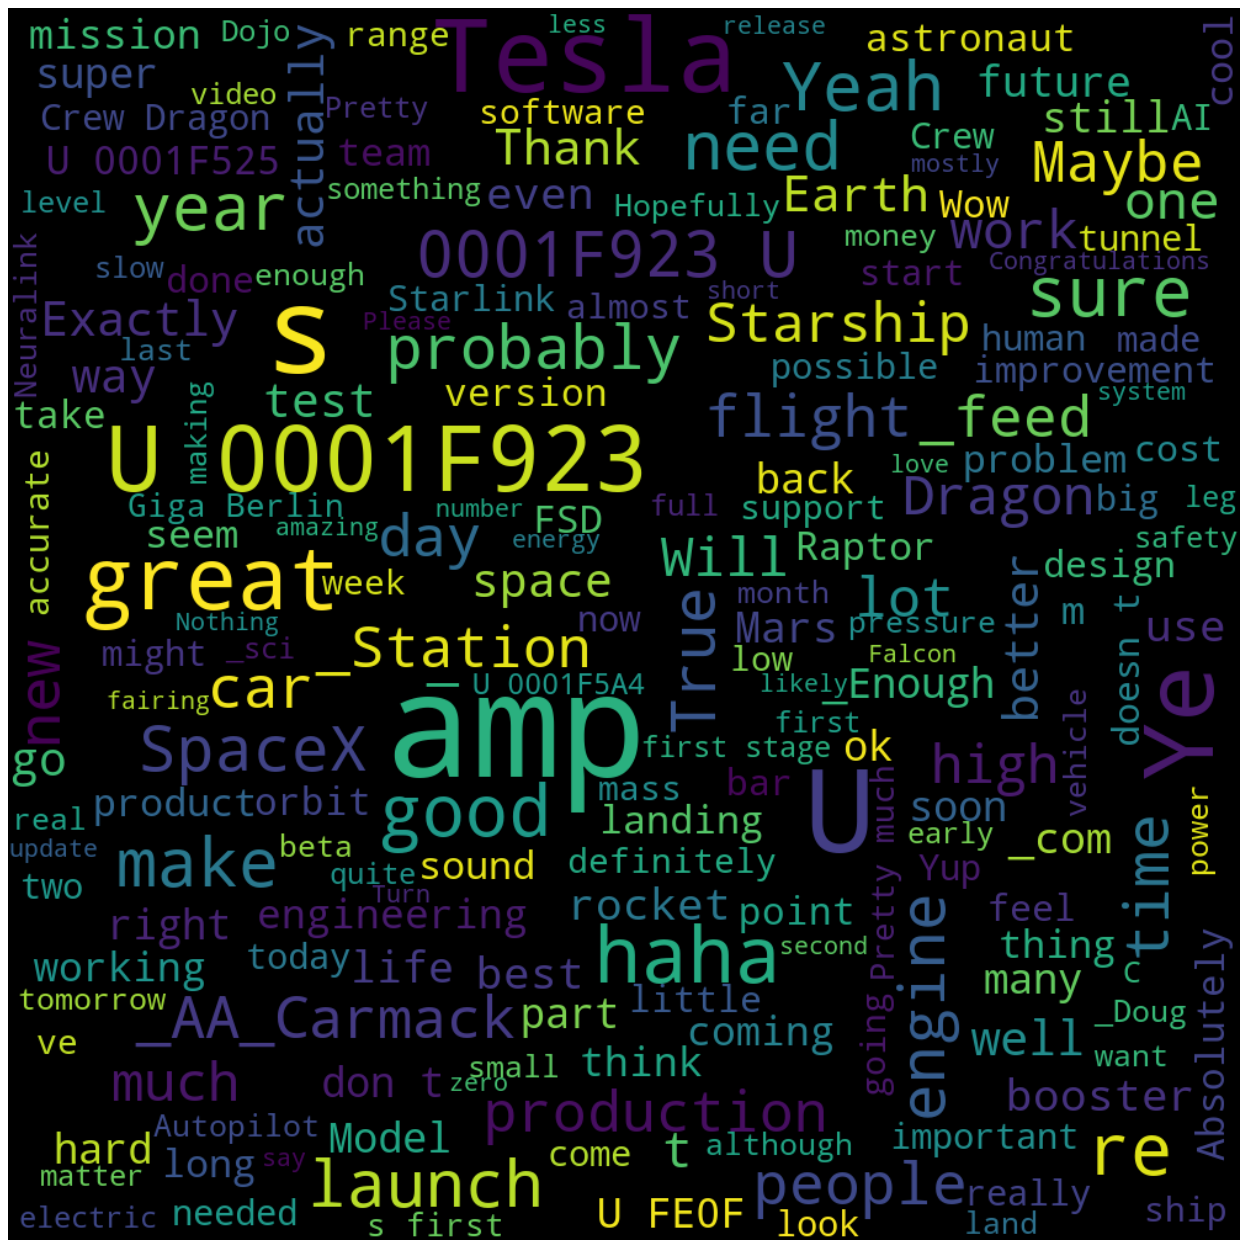

In [32]:
# Creating a word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in df['Text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [29]:
!pip install wordcloud

                                              0.0/152.1 kB ? eta -:--:--
     ---------------                         61.4/152.1 kB 1.7 MB/s eta 0:00:01
     -----------------------------------    143.4/152.1 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 152.1/152.1 kB 1.3 MB/s eta 0:00:00


In [33]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    

In [34]:
# Create a New Analysis Column
df["analysis"] = df["polarity"].apply(analysis)
df

,Text,subjectivity,polarity,analysis
0,Im alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing Cyberpunk HDR next-lev...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China amazing execution ...,0.366667,0.345313,Positive
...,...,...,...,...
1994,"True, sounds surreal, negative propaganda stil...",0.508333,0.111111,Positive
1995,Make sure read ur terms &amp conditions clicki...,0.888889,0.625000,Positive
1996,Samwise Gamgee,0.000000,0.000000,Neutral
1997,Altho Dumb Dumber <U+0001F525><U+0001F525>,0.500000,-0.375000,Negative


In [35]:
# Displaying the positive and negative tweets
     

positive_tweets = df[df['analysis'] == 'Positive']
negative_tweets = df[df['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])
     

positive tweets
 -Great interview!
 -Congratulations Tesla China amazing execution last year. Now next even more!!
 -Happy New Year Ox!
 -_ Haha thanks )
 -The entertaining outcome likely
negative tweets
 -Im alien
 -Frodo underdoge, All thought would fail, Himself all.
 -Your app sucks
 -_ Starlink staggeringly difficult technical &amp economic endeavor. However,
 -_ SpaceX needs pass deep chasm negative cash flow next year


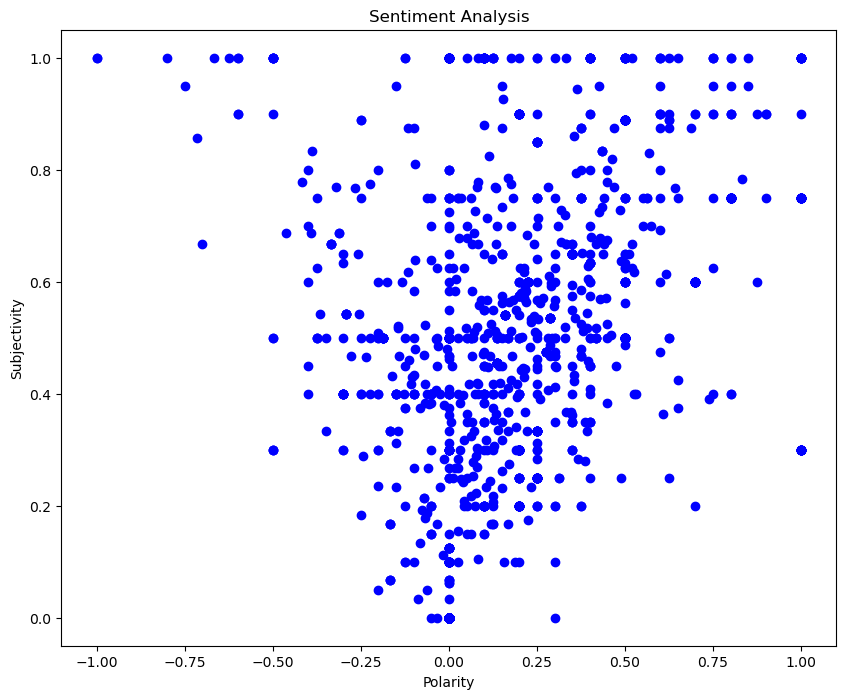

In [36]:
# Is Elon generally positive or negative?

plt.figure(figsize=(10, 8))
for i in range(0, df.shape[0]):
    plt.scatter(df["polarity"][i], df["subjectivity"][i], color = "blue")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity") 
plt.ylabel("Subjectivity") 
plt.show() 
     

In [37]:
len(positive_tweets) / len(negative_tweets)

4.217821782178218

In [ ]:
#Elon mostly do positive tweets compared to negative